# Handwritting Recognition

### Importing models and dataset 

In [86]:
from tkinter import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,GRU
from keras.datasets import mnist
from keras.models import Sequential
from keras import backend as K
import tensorflow as tf

In [87]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [88]:
print(x_train.shape)

(60000, 28, 28)


In [89]:
print(y_train.shape)

(60000,)


In [90]:
x_train[:,1:2]

array([[[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

### Preprocessing

In [91]:
x_train2 = x_train.reshape(x_train.shape[0],28,28,1)
x_test2 = x_test.reshape(x_test.shape[0],28,28,1)

In [92]:
input = (28,28,1)

In [93]:
y_train2 = keras.utils.to_categorical(y_train,10)
y_test2 = keras.utils.to_categorical(y_test,10)

In [94]:
x_train2 = x_train2.astype('float32')
x_test2 = x_test2.astype('float32')

In [95]:
x_train2 = x_train2/255
x_test2 = x_test2/255

In [96]:
x_train2.shape

(60000, 28, 28, 1)

In [97]:
x_test2.shape

(10000, 28, 28, 1)

In [98]:
y_train2.shape

(60000, 10)

In [99]:
y_test2.shape

(10000, 10)

## CNN

In [100]:
bs = 64
e=10
num_classes = 10

In [101]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [102]:
history=model.fit(x_train2,y_train2,batch_size=bs,epochs=e,validation_data=(x_test2,y_test2))

Epoch 1/10
938/938 [==============================] - 9s 9ms/step - loss: 0.7947 - accuracy: 0.7294 - val_loss: 0.0506 - val_accuracy: 0.9845
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 0.1094 - accuracy: 0.9712 - val_loss: 0.0445 - val_accuracy: 0.9869
Epoch 3/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0814 - accuracy: 0.9777 - val_loss: 0.0278 - val_accuracy: 0.9918
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0647 - accuracy: 0.9845 - val_loss: 0.0333 - val_accuracy: 0.9900
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0489 - accuracy: 0.9869 - val_loss: 0.0327 - val_accuracy: 0.9911
Epoch 6/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0424 - accuracy: 0.9882 - val_loss: 0.0256 - val_accuracy: 0.9930
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0331 - accuracy: 0.9915 - val_loss: 0.0290 - val_accuracy: 0.9925
Epoch 

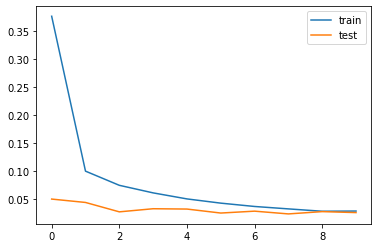

In [103]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [104]:
s = model.evaluate (x_test2,y_test2)
s[0]=s[0]*100
s[1]=s[1]*100
print('Test loss:', s[0])
print('Test accuracy:', s[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9937
Test loss: 2.643417753279209
Test accuracy: 99.37000274658203


In [105]:
model.save('mnist_cnn.h5')

## GRU

In [106]:
x_train1 = x_train.reshape(x_train.shape[0],28,x_train.shape[1])
x_test1 = x_test.reshape(x_test.shape[0],28,x_test.shape[1])

In [107]:
x_train1.shape

(60000, 28, 28)

In [108]:
y_train1 = y_train.reshape(y_train.shape[0],1,1)
y_test1 = y_test.reshape(y_test.shape[0],1,1)

In [109]:
y_train1.shape

(60000, 1, 1)

In [110]:
import warnings
warnings.filterwarnings("ignore")

epochs = 5

model1 = Sequential()

model1.add(GRU(units=50,return_sequences=True,input_shape=(x_train.shape[0],x_train.shape[1])))
model1.add(Dropout(0.3))
model1.add(GRU(units=5,return_sequences=True))
model1.add(Dropout(0.3))
model1.add(GRU(units=50,return_sequences=True))
model1.add(Dropout(0.3))
model1.add(GRU(units=50))
model1.add(Dropout(0.3))
model1.add(Dense(units=9))

model1.compile(optimizer='adam',loss='mse',metrics= ['accuracy'])

history=model1.fit(x_train1,y_train1, batch_size = 32, epochs = epochs,validation_data=(x_test1, y_test1))

Epoch 1/5
1875/1875 [==============================] - 76s 38ms/step - loss: 7.6774 - accuracy: 0.1069 - val_loss: 2.1815 - val_accuracy: 0.1163
Epoch 2/5
1875/1875 [==============================] - 70s 38ms/step - loss: 2.4761 - accuracy: 0.1108 - val_loss: 1.5207 - val_accuracy: 0.0846
Epoch 3/5
1875/1875 [==============================] - 70s 38ms/step - loss: 1.9076 - accuracy: 0.1040 - val_loss: 1.1526 - val_accuracy: 0.0998
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 1.5646 - accuracy: 0.0937 - val_loss: 1.0228 - val_accuracy: 0.1083
Epoch 5/5
1875/1875 [==============================] - 70s 37ms/step - loss: 1.3439 - accuracy: 0.0985 - val_loss: 0.9160 - val_accuracy: 0.0869


In [111]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 60000, 50)         12000     
_________________________________________________________________
dropout_18 (Dropout)         (None, 60000, 50)         0         
_________________________________________________________________
gru_13 (GRU)                 (None, 60000, 5)          855       
_________________________________________________________________
dropout_19 (Dropout)         (None, 60000, 5)          0         
_________________________________________________________________
gru_14 (GRU)                 (None, 60000, 50)         8550      
_________________________________________________________________
dropout_20 (Dropout)         (None, 60000, 50)         0         
_________________________________________________________________
gru_15 (GRU)                 (None, 50)               

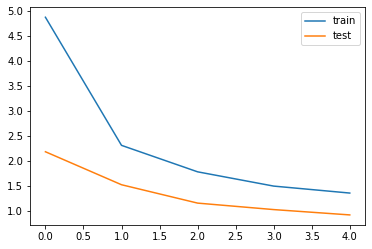

In [112]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [113]:
s1 = model1.evaluate (x_test,y_test)
s1[0]=s1[0]*100
s1[1]=s1[1]*100
print('Test loss:', s1[0])
print('Test accuracy:', s1[1])

313/313 [==============================] - 5s 13ms/step - loss: 0.9160 - accuracy: 0.0869
Test loss: 91.59550666809082
Test accuracy: 8.69000032544136


In [114]:
model1.save('mnist_gru.h5')